#  <u> 1st step : Load

We import the different librairies that we are going to use :

    - pandas : Pandas is a library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical arrays and time series.
    
    - Seaborn : is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
    
    - Matplotlib : Matplotlib is a Python programming language library for plotting and visualizing data as graphs.
    
    - plotly.express : It provides more than 30 functions for creating different types of figures.
    
    
    - sklearn.cluster : Clustering of unlabeled data can be performed with the module sklearn.cluster. Each clustering algorithm comes in two variants: a class, that implements the fit method to learn the clusters on train data, and a function, that, given train data, returns an array of integer labels corresponding to the different clusters. For the class, the labels over the training data can be found in the labels_ attribute.
    
    - StandardScaler : The sklearn.preprocessing package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.

In [86]:
# we import the useful librairies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np 

# librairies for kmeans algorithm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

We open the final table with NaN values filled  of the 'filling part ' 

In [87]:
df = pd.read_csv ('./data/GoldenDataFrameWithoutCluster.csv')
df = df.drop(df.columns[0], axis = 1)
df

,Unnamed,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education
0,14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871
1,14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871
2,14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871
3,14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871
4,14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871
...,...,...,...,...,...,...,...,...,...
20900,14701,OWID_CIS,2002,NaN,NaN,4.169948e-04,NaN,NaN,NaN
20901,14702,OWID_CIS,2003,NaN,NaN,4.211831e-04,NaN,NaN,NaN
20902,14703,OWID_CIS,2004,NaN,NaN,4.381676e-04,NaN,NaN,NaN
20903,14704,OWID_CIS,2005,NaN,NaN,4.553510e-04,NaN,NaN,NaN


#  <u> 2nd step  : clustering by country

## k-means clustering  method 

We we try to find groups of similar values to use the k-means clustering  method 


The KMeans algorithm  of vector quantization. 
It clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.   
This algorithm requires the number of clusters to be specified.   
It scales well to large numbers of samples and has been used across a large range of application areas in many different fields.

k-means clustering is a method , that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. 


It is a good first method of clustering but we will lose the time dimension.

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:




kmeans_kwargs = some arguments for the kmeans method :

- init random = choose n_clusters observations (rows) at random from data for the initial centroids.

- n_init   =  Number of time the k-means algorithm will be run with different centroid seeds. 
The final results will be the best output of n_init consecutive runs in terms of inertia.

 - random state = Determines random number generation for centroid initialization. 
 
 
kmeans.inertia = return The final value of the inertia criterion (sum of squared distances to the closest centroid for all observations in the training set).


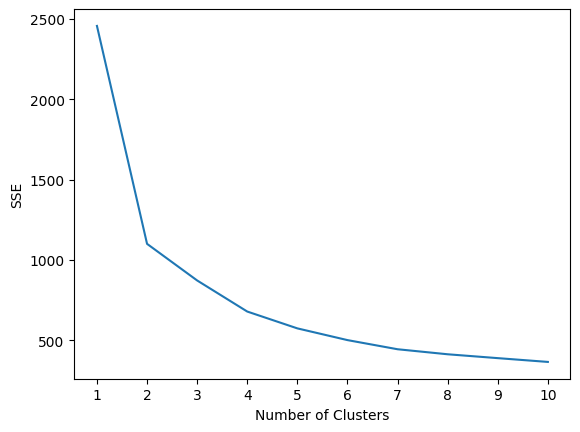

In [88]:
# then we drop the columns which are not the indicators columns 
scaled_df = df.drop(df.columns[1], axis = 1)
scaled_df = scaled_df.drop(scaled_df.columns[0], axis = 1)
scaled_df = scaled_df.drop(scaled_df.columns[0], axis = 1)

scaled_df = scaled_df.dropna()

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10, 
"random_state": 1,
}

#create list to hold SSE values for each k
# SSE = sum of the squared Euclidean distances of each point to its closest centroid
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


The best number of cluster is 2 or 3. It can be find by looking at the elbow of the graph of the function.
Indeed, the “fall” of the variance curve (distortion) between 1 and 3 clusters is significantly greater than that between 5 clusters and 9 clusters and after this elbow point the variance is no longer significantly reduced.


In [89]:
#instantiate the k-means class, using optimal number of clusters
kmeans = KMeans(init="random", n_clusters=3, n_init=10, random_state=1)

#fit k-means algorithm to data
kmeans.fit(scaled_df)

#view cluster assignments for each observation
print(kmeans.labels_)

#view center of clusters
centers = kmeans.cluster_centers_
print(centers)

[2 2 2 ... 2 2 2]
[[1.50341843e-02 6.82744219e-01 2.81925741e-04 7.33173380e-01
  4.83948937e-01 3.97376025e-02]
 [4.11102464e-03 3.03934215e-01 2.72790650e-03 5.83158567e-01
  7.23330066e-01 1.25064609e-01]
 [1.40328647e-03 1.96078518e-01 4.09440712e-03 2.31692903e-01
  7.03748041e-01 2.29470549e-01]]



Then we add the cluster number of each country to the table 

In [90]:
# Then we drop the Nan values 
init = df.copy()
init = init.dropna()

#append cluster assingments to original DataFrame
init['cluster'] = kmeans.labels_

init

,Unnamed,Code,Year,Deaths,Fertility,GDP,GenderInequality,LifeExpectancy,tertiary_education,cluster
0,14098,NOR,1831,0.000114,0.217868,5.892337e-07,0.147095,0.483624,0.096871,2
1,14099,NOR,1832,0.000114,0.217868,5.182407e-07,0.147095,0.483624,0.096871,2
2,14100,NOR,1833,0.000114,0.217868,5.602877e-07,0.147095,0.483624,0.096871,2
3,14101,NOR,1834,0.000114,0.217868,6.143394e-07,0.147095,0.483624,0.096871,2
4,14102,NOR,1835,0.000114,0.217868,6.790523e-07,0.147095,0.483624,0.096871,2
...,...,...,...,...,...,...,...,...,...,...
20570,8683,HRV,2017,0.000015,0.083368,3.257590e-03,0.144623,0.887248,0.367510,2
20571,8684,HRV,2018,0.000014,0.088788,3.257590e-03,0.138443,0.889933,0.367510,2
20572,8685,HRV,2019,0.000014,0.088998,3.257590e-03,0.131026,0.895302,0.367510,2
20573,8686,HRV,2020,0.000013,0.088308,3.257590e-03,0.101360,0.885906,0.367510,2


We can print the number of country for each cluster, it seems a lot but it is because the cluster don't have unique country  


In [91]:
nb_cluster= init.cluster.value_counts()
nb_cluster

cluster
2    5344
0    4943
1    3382
Name: count, dtype: int64

That's why we are going to create a list for each cluster only with unique country


In [92]:
# we create 3 lists 
liste2 = []
liste1 = []
liste0 = []
i=0

#for each line of the code column we check the numero of cluster and add the country in the corresponding list
for country in init['Code'] :
    if (int(init.iloc[i,9]) == 2) :
        liste2 = liste2 + [country]
        
    if (int(init.iloc[i,9]) == 1)  :
        liste1 = liste1 + [country]
        
    if (int(init.iloc[i,9]) == 0)   :
        liste0 = liste0 + [country]
        
    i=i+1

print('liste 2', liste2 )
print('\n liste 1',liste1 )
print('\nliste 0',liste0 )


liste 2 ['NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR', 'NOR

Then we calculate the number of different countries 

In [93]:
nb_countries_serie = df.Code.value_counts()
list_diff_countries = nb_countries_serie.index.tolist()

Now we are going to create a dictionnary with all the country and their cluster and also 3 lists, one for each cluster 


In [101]:
dico = {}
cluster1= []
cluster2=[]
cluster0=[]

# for each uniaue country, we count the numer of times that the country is affected to cluster numner 1, 2 or 0 
for country in list_diff_countries :
    nb2 = liste2.count(country)
    nb1 = liste1.count(country)
    nb0 = liste0.count(country)
    
    total = max(nb2,nb1,nb0)

    #Then we affect the country to the numero of cluster that is the most affected to the country 
    if total == nb2 :
        dico[country] = 2
        cluster2.append(country)
        
    elif total == nb1 :
        dico[country] = 1
        cluster1.append(country)
        
    elif total == nb0 :
        dico[country] = 0
        cluster0.append(country)
    
dico 

{'NOR': 2,
 'USA': 2,
 'AUS': 2,
 'FRA': 2,
 'ESP': 2,
 'SWE': 2,
 'GBR': 2,
 'PRT': 2,
 'NLD': 2,
 'CHL': 0,
 'DNK': 2,
 'COL': 0,
 'ISL': 2,
 'BEL': 2,
 'GRC': 2,
 'CHE': 2,
 'FIN': 2,
 'BRA': 0,
 'ITA': 2,
 'JPN': 2,
 'CAN': 2,
 'CHN': 0,
 'NZL': 2,
 'DEU': 2,
 'URY': 1,
 'JAM': 1,
 'ARG': 1,
 'EGY': 0,
 'RUS': 1,
 'VNM': 0,
 'MEX': 0,
 'LUX': 2,
 'CUB': 1,
 'SGP': 2,
 'ZAF': 0,
 'TWN': 2,
 'GTM': 0,
 'KOR': 2,
 'BGR': 1,
 'ZWE': 0,
 'HND': 0,
 'MMR': 0,
 'IDN': 0,
 'HUN': 2,
 'PRI': 2,
 'AUT': 2,
 'IRL': 2,
 'IND': 0,
 'ECU': 1,
 'CRI': 1,
 'PER': 0,
 'SLV': 0,
 'BOL': 0,
 'THA': 1,
 'CYP': 2,
 'PRK': 2,
 'BGD': 0,
 'HTI': 0,
 'LKA': 1,
 'TUR': 1,
 'NIC': 0,
 'PAN': 1,
 'ZMB': 0,
 'PHL': 1,
 'TUN': 0,
 'DZA': 0,
 'DOM': 1,
 'SEN': 0,
 'NER': 0,
 'PAK': 0,
 'LBR': 0,
 'SYR': 0,
 'ISR': 2,
 'OWID_WRL': 2,
 'VEN': 1,
 'SLE': 0,
 'ETH': 2,
 'KHM': 0,
 'LBN': 2,
 'POL': 2,
 'IRQ': 0,
 'MYS': 1,
 'IRN': 0,
 'ROU': 1,
 'MNG': 0,
 'MUS': 1,
 'SAU': 0,
 'ALB': 1,
 'AGO': 2,
 'PRY': 1,
 'FSM

In [102]:
print('cluster1' ,cluster1)
print('\n cluster2' ,cluster2)
print('\n cluster0',cluster0)

cluster1 ['URY', 'JAM', 'ARG', 'RUS', 'CUB', 'BGR', 'ECU', 'CRI', 'THA', 'LKA', 'TUR', 'PAN', 'PHL', 'DOM', 'VEN', 'MYS', 'ROU', 'MUS', 'ALB', 'PRY', 'BLZ', 'BRB', 'ARM', 'LVA', 'GUY', 'KAZ', 'KGZ', 'MDA', 'FJI', 'TTO', 'EST', 'UKR', 'QAT']

 cluster2 ['NOR', 'USA', 'AUS', 'FRA', 'ESP', 'SWE', 'GBR', 'PRT', 'NLD', 'DNK', 'ISL', 'BEL', 'GRC', 'CHE', 'FIN', 'ITA', 'JPN', 'CAN', 'NZL', 'DEU', 'LUX', 'SGP', 'TWN', 'KOR', 'HUN', 'PRI', 'AUT', 'IRL', 'CYP', 'PRK', 'ISR', 'OWID_WRL', 'ETH', 'LBN', 'POL', 'AGO', 'FSM', 'BHR', 'BHS', 'BIH', 'BLM', 'BLR', 'BMU', 'BRN', 'GIB', 'GIN', 'LCA', 'GLP', 'BTN', 'BFA', 'BES', 'GEO', 'GGY', 'AIA', 'AND', 'ASM', 'ATG', 'AZE', 'LTU', 'MAC', 'GNQ', 'GRD', 'GRL', 'GUF', 'GUM', 'HKG', 'IMN', 'JEY', 'KIR', 'LIE', 'GNB', 'KNA', 'MAF', 'FLK', 'MCO', 'MDG', 'MHL', 'MKD', 'MLT', 'MNP', 'FRO', 'WSM', 'TCA', 'TLS', 'UZB', 'PYF', 'VAT', 'VCT', 'VGB', 'VIR', 'VUT', 'WLF', 'TKM', 'TKL', 'MYT', 'PLW', 'NCL', 'NGA', 'OWID_KOS', 'OMN', 'NIU', 'NRU', 'SPM', 'PSE', 'TCD', 'S

# 3rd step :  Scatter plot 

A scatter plot helps detect trends and patterns in data.   
For example, an upward or downward slope can indicate a positive or negative correlation between variables.

The scatterplot can be used to compare the distribution of data between different cluster.


We create two functions : 
The first collects the closest value to a value given

The second collects the year associated to the value of the center of the cluster


In [103]:
#This function computes the nearest value from a given value 
def nearest_value(liste, valeur):
    return min(liste, key=lambda x: abs(x - valeur))

#position indicator = indice of the indicator 
def collect_year(str_indicator_x,str_indicator_y,position_indicator) :
    
    #empty list corresponding to the year of the center of the cluster or the value of the second indicator
    year_cluster = []
    
    #cluster_real_value = in the column of the second indicator, 
    # the nearest value from the value of the center of the first cluster for this indicator
    # We need to do this because the center of the cluster may not be a value of the dataset
    cluster_real_value = nearest_value(init[str_indicator_y], centers[0][position_indicator])
    
    #year_cluster = we add the value of the first inidcator associated with the cluster real value
    year_cluster = year_cluster + [init.loc[init[str_indicator_y] == cluster_real_value, str_indicator_x].iloc[0]]

    #We do the same for the second cluster 
    cluster_real_value = nearest_value(init[str_indicator_y], centers[1][position_indicator])
    year_cluster = year_cluster + [init.loc[init[str_indicator_y] == cluster_real_value, str_indicator_x].iloc[0]]

    #We do the same for the last cluster 
    cluster_real_value = nearest_value(init[str_indicator_y], centers[2][position_indicator])
    year_cluster = year_cluster + [init.loc[init[str_indicator_y] == cluster_real_value, str_indicator_x].iloc[0]]
    
    return year_cluster

we reduce the dataset to have a cleaner chart  
then we plot the dispersion chart of fertility for each year and we display the center of each cluster

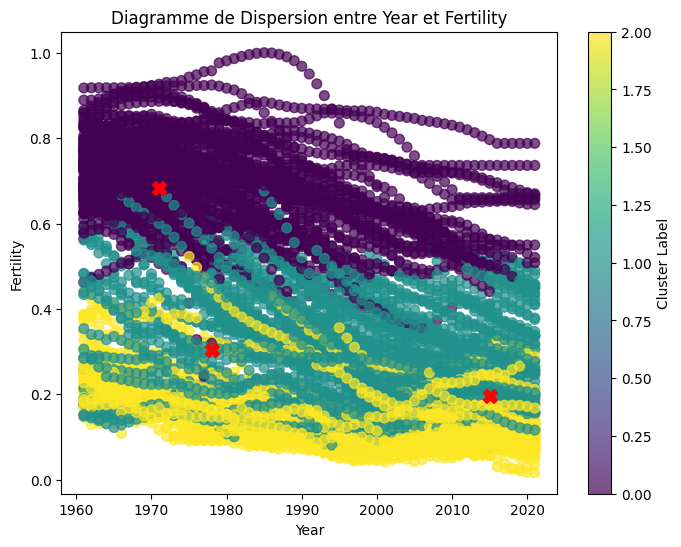

In [104]:
init = init[init['Year'] > 1960]

plt.figure(figsize=(8, 6))
plt.scatter(init['Year'], init['Fertility'], c=init['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Year')
plt.ylabel('Fertility')
plt.title("Diagramme de Dispersion entre {} et {}".format('Year', 'Fertility'))
plt.colorbar(label='Cluster Label')


year_cluster = collect_year('Year','Fertility',1)

plt.scatter(year_cluster[0], centers[0][1], c='red', marker='X', s=100, label='Centres des clusters')
plt.scatter(year_cluster[1], centers[1][1], c='red', marker='X', s=100, label='Centres des clusters')
plt.scatter(year_cluster[2], centers[2][1], c='red', marker='X', s=100, label='Centres des clusters')


plt.show()

##### For instance if we plot the scatter plot for child mortality and fertily, we cans see how our cluster were made.
Besides we cans see an upward slope corresponding to a positive correlation between Child mortality and fertility.
It is in agreement with the cluster by indicators that we made before. Indeed these two indicators were in the same cluster.

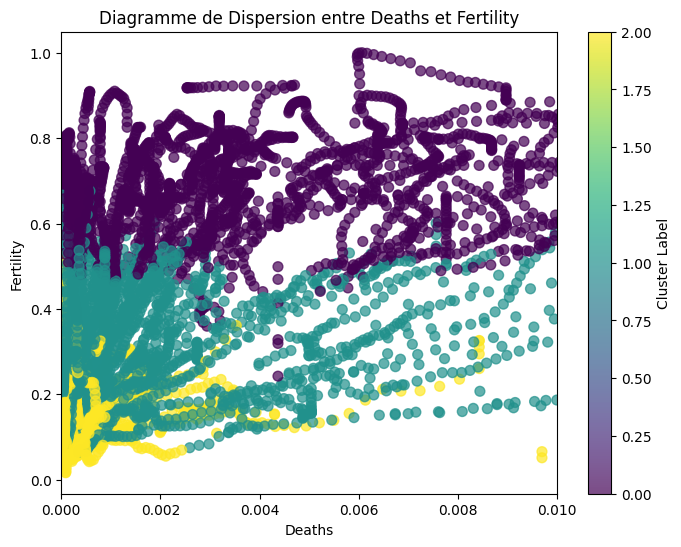

In [105]:
plt.figure(figsize=(8, 6))
plt.scatter(init['Deaths'], init['Fertility'], c=init['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Deaths')
plt.ylabel('Fertility')
plt.title("Diagramme de Dispersion entre {} et {}".format('Deaths', 'Fertility'))
plt.colorbar(label='Cluster Label')

plt.gca().set_xlim(0,0.01)
plt.show()

Then  if we plot the scatter plot for tertiary_education and fertily, we cans see how our cluster were made.
Besides we cans see an downward slope corresponding to a negative correlation between Child mortality and fertility.
It is in agreement with the cluster by indicators that we made before. Indeed these two indicators are not in the same cluster.

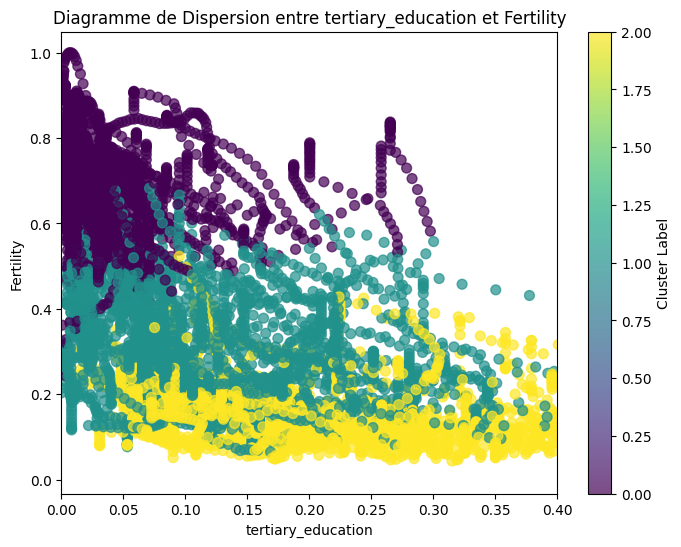

In [106]:
plt.figure(figsize=(8, 6))
plt.scatter(init['tertiary_education'], init['Fertility'], c=init['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('tertiary_education')
plt.ylabel('Fertility')
plt.title("Diagramme de Dispersion entre {} et {}".format('tertiary_education', 'Fertility'))
plt.colorbar(label='Cluster Label')
plt.gca().set_xlim(0,0.4)

plt.show()

Then  if we plot the scatter plot for tertiary_education and Life expectancy , we cans see how our cluster were made.
Besides we cans see an upward slope corresponding to a positive correlation between tertiary education and life expectancy.
It is in agreement with the cluster by indicators that we made before. Indeed these two indicators are not in the same cluster.

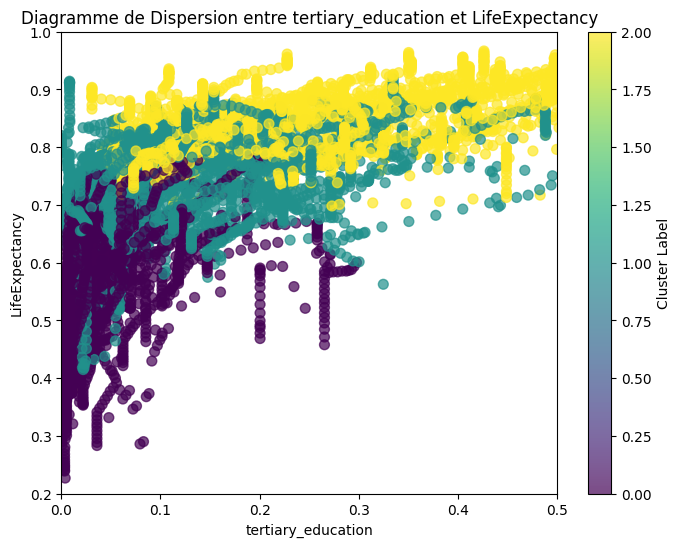

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(init['tertiary_education'], init['LifeExpectancy'], c=init['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('tertiary_education')
plt.ylabel('LifeExpectancy')
plt.title("Diagramme de Dispersion entre {} et {}".format('tertiary_education', 'LifeExpectancy'))
plt.colorbar(label='Cluster Label')

plt.gca().set_xlim(0,0.5)
plt.gca().set_ylim(0.2,1)
plt.show()